In [3]:
import pandas as pd

<h3>Reading the inputfile as dataframe</h3>

In [4]:
df = pd.read_csv("D://Great learning//Datasets//Bank_Personal_Loan_Modelling-1.csv")

<h3>This will show whether we have headers or not in the dataset and display it</h3>

In [35]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### Lets view few rows of the dataset

In [102]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_category
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0



 ### This will tell us the number of columns,rows and also null value info.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<h3>We have 14 columns and 5000 rows</h3>

In [38]:
df.shape

(5000, 14)

<h3>To tell us the total number of missing values in each column. We have no categorical type variables here. All are numeric.</h3>

In [39]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<h3>Lets start working with the Deep copy of our dataframe.
The modifications done to the copy will not get reflected in the orginal df.</h3>

In [14]:
df_mod = df.copy(deep=True)

<h3>This gives us a 5 point summary of our dataframe. While using the 'include all', it gives descriptive statistics about both the numerical and categorical variables present. Here anyways we have only numerical values present.</h3>

In [15]:
df_mod.describe(include= 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<h3>lets drop the ID column as it is not going to contribute any value to our analysis</h3>

In [16]:
df_mod.drop(['ID'], axis=1, inplace=True)

<h3>Moving the target variable 'Personal Loan' to the end of the dataframe</h3>

In [17]:
df_mod = df_mod.reindex(columns=['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard','Personal Loan'])

<h3>Analysing the correlation between attributes</h3>

In [18]:
df_mod.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007413
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954
CD Account,0.008043,0.010353,0.169738,0.019972,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644,0.316355


<h3>Lets drop the Zip Code as well</h3>

In [19]:
df_mod.drop(['ZIP Code'], axis=1, inplace=True)

<h3>Visualizing the correlation using pairplot</h3>

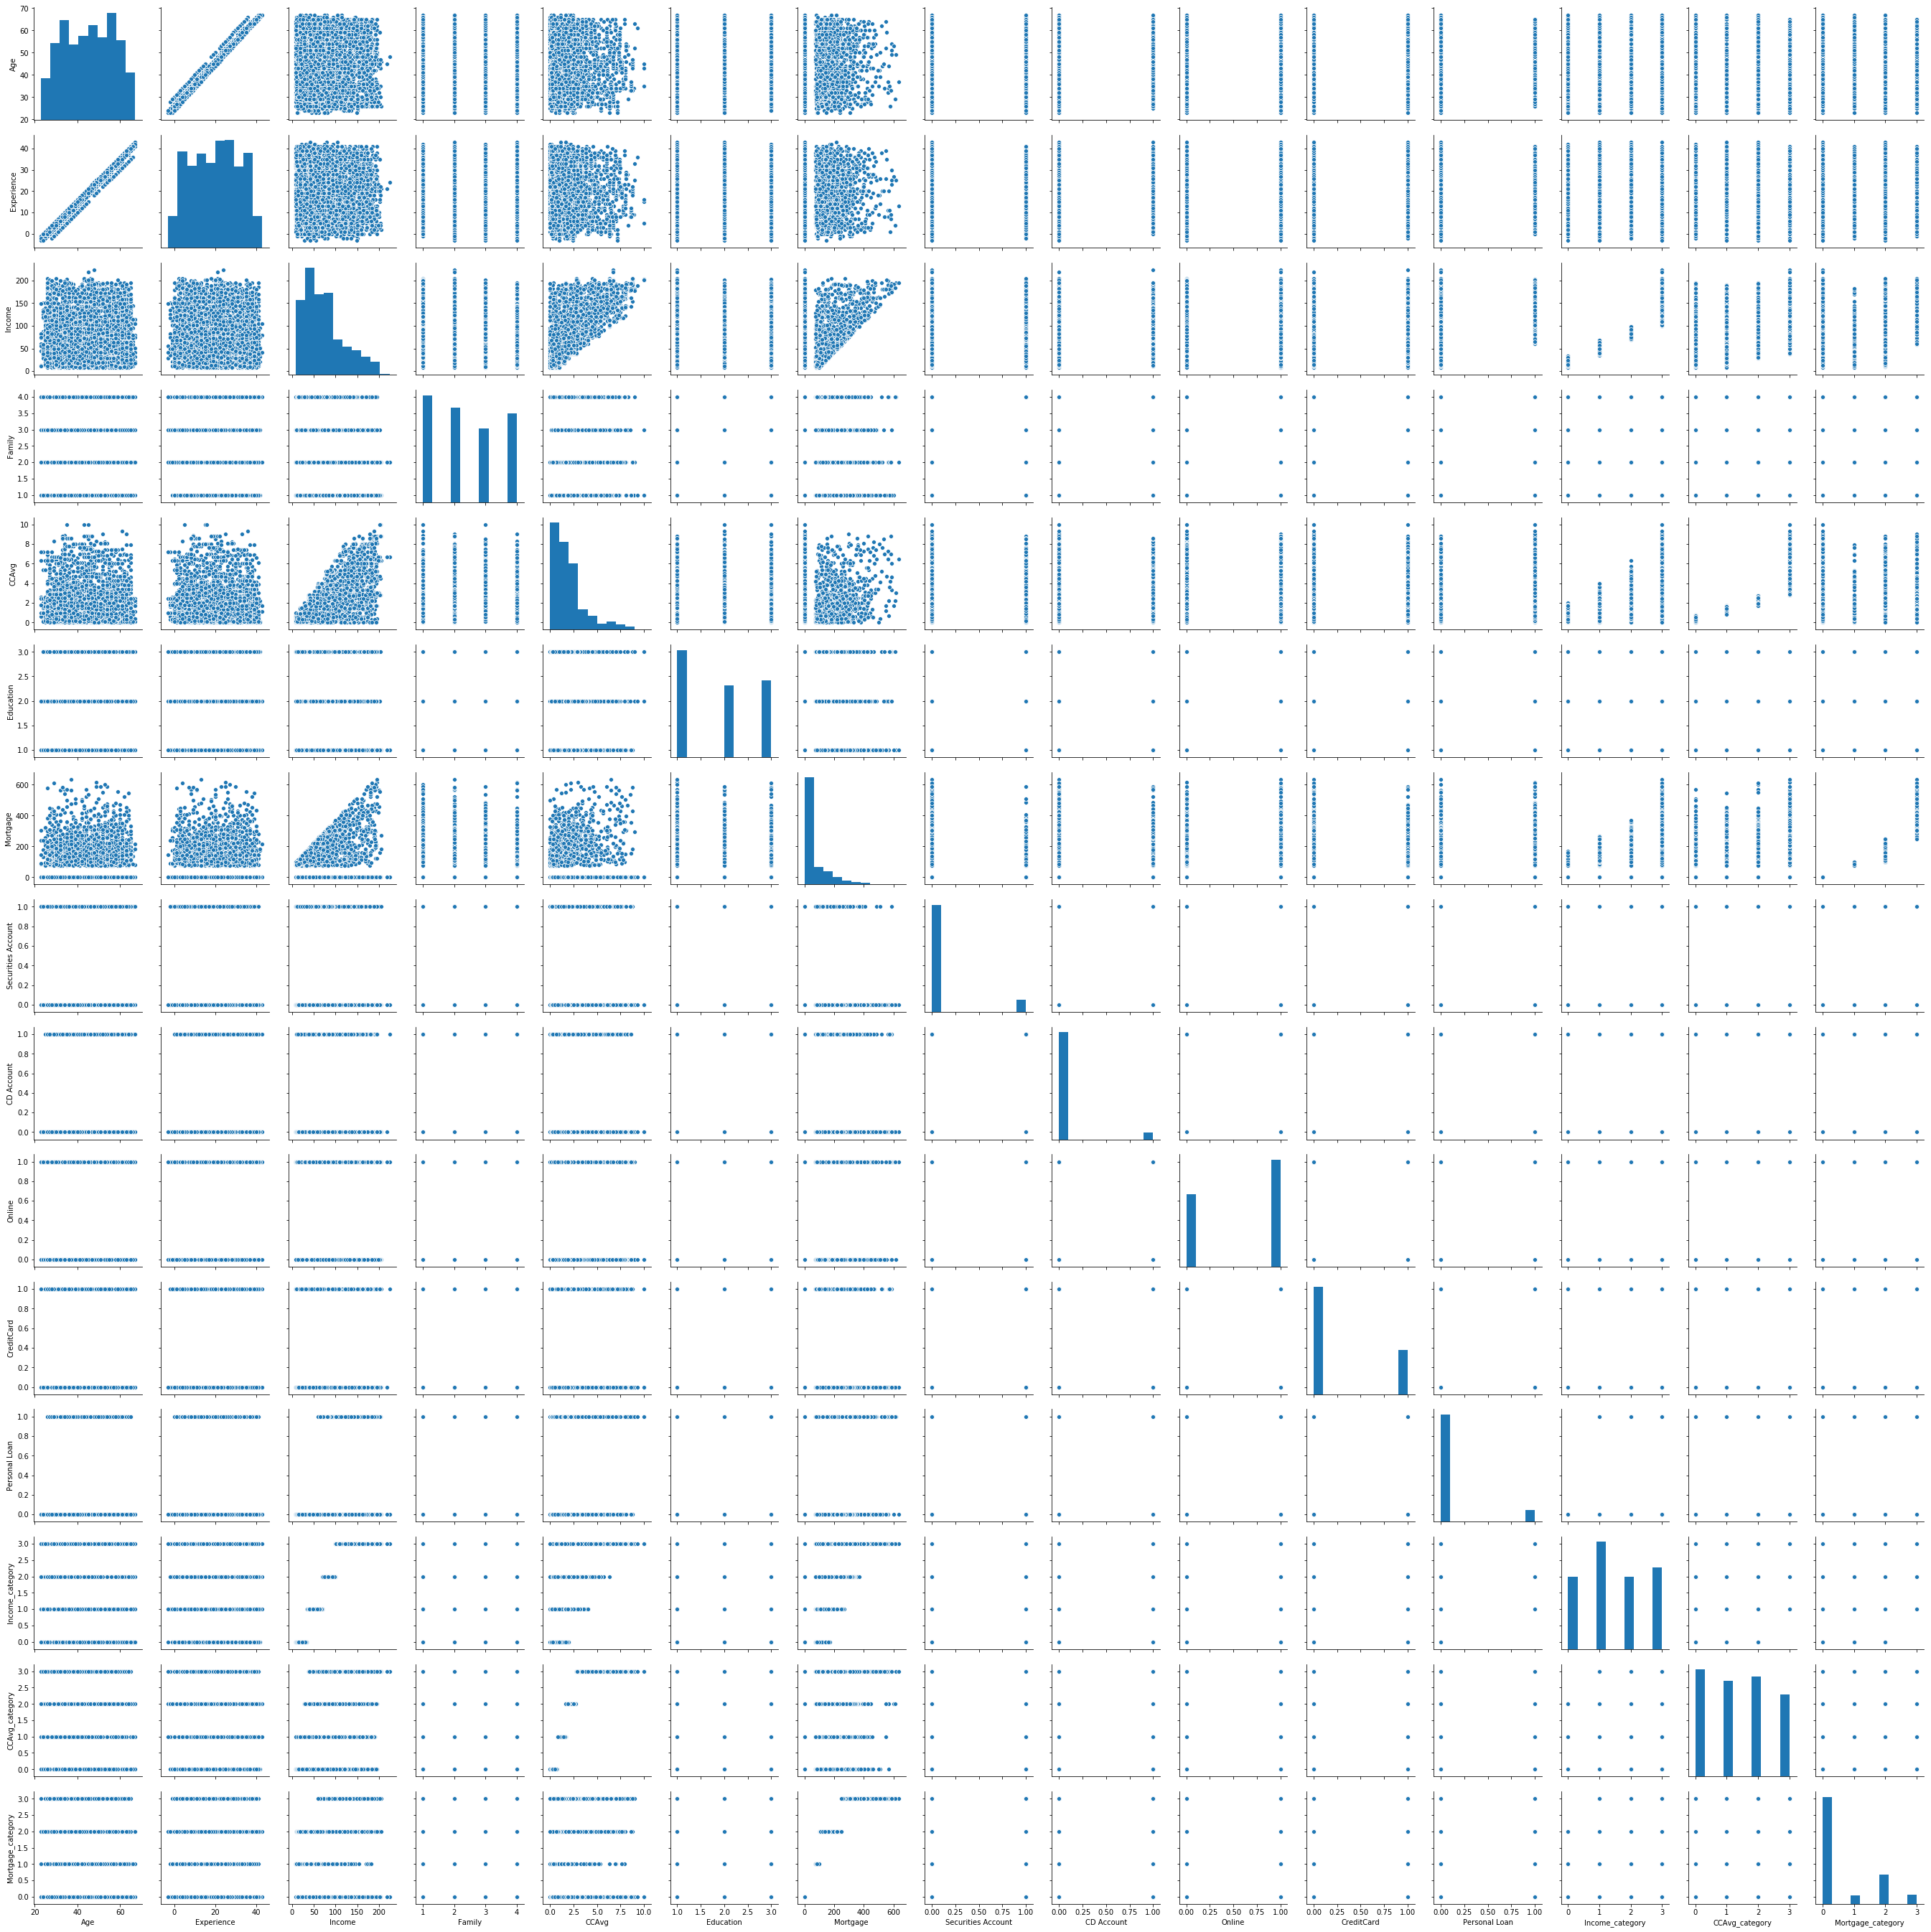

In [107]:
import seaborn as sns
sns.pairplot(df_mod)

<h3>I could see a highly positive correlation with Age & Experience
Some correlation with
Income - CCAvg, 
Income - Personal Loan, 
CCAvg - Personal Loan, 
Mortgage - Income,
CD Account and Personal loan
Lets verify this by visualizing on each case</h3>

<h3>Splitting Income in to 4 Categories.</h3>

In [25]:
df_mod['Income_category'] = df_mod['Income'].apply(lambda x: 0 if x<35 else 1 if 35<=x<70 else 2 if 70<=x<100 else 3)

<h3>Plotting a continous and categorical variable, Im using a barplot..</h3>

<h3>It seems People whose income is less than 70 has not accepted the personal loan from the Campaign</h3>

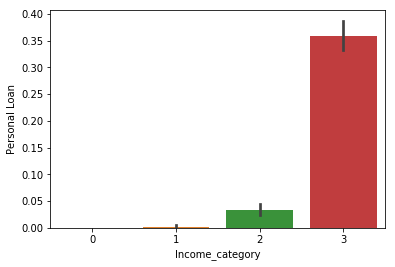

In [29]:
sns.barplot(df_mod['Income_category'],df_mod['Personal Loan']) 

<h3>There is good positive correlation between Income and average spend on Credit card.
People who has high income seems to spend more on Credit card,
But People whose income below 100 outnumber the people who are highly paid in usage of Credit card</h3>

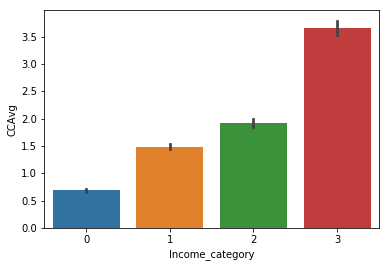

In [30]:
sns.barplot(df_mod['Income_category'],df_mod['CCAvg']) 

<h3>Splitting average spend on credit card in to four categories.
People with high spend on credit card tend to accept personal loan</h3>

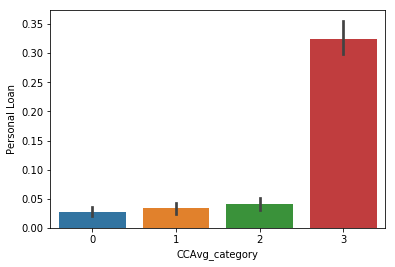

In [37]:
df_mod['CCAvg_category'] = df_mod['CCAvg'].apply(lambda x: 0 if x<0.8 else 1 if 0.8<=x<1.7 else 2 if 1.7<=x<2.8 else 3)
sns.barplot(df_mod['CCAvg_category'],df_mod['Personal Loan']) 

<h3>As income increases above 100,People posess high value of mortgage</h3>

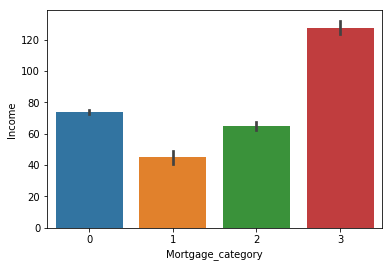

In [39]:
df_mod['Mortgage_category'] = df_mod['Mortgage'].apply(lambda x: 0 if x==0 else 1 if 0<x<=100 else 2 if 100<x<250 else 3)
sns.barplot(df_mod['Mortgage_category'], df_mod['Income'])

<h3>Lets build the model</h3>

In [51]:
y = df_mod['Personal Loan']
X = df_mod.drop('Personal Loan', axis=1)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 1)

<h3>Implementing Logistic Regression</h3>

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
y_predict = model.predict(X_test)

In [57]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9513333333333334


In [58]:
expected = y_test
predicted = y_predict

<h3>Print Confusion Matrix
</h3>

In [60]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.82      0.65      0.73       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500

[[1330   21]
 [  52   97]]


<h3>Implementing Naive Bayes
</h3>

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
expected = y_test
predicted = model.predict(X_test)

In [64]:
print(model_score)

0.9513333333333334


In [65]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1351
           1       0.41      0.75      0.53       149

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.69      0.82      0.73      1500
weighted avg       0.91      0.87      0.88      1500

[[1189  162]
 [  37  112]]


<h3>Implementing KNN</h3>

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [97]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [98]:
y_pred = knn.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
print(accuracy_score(y_test, y_pred))

0.906


In [100]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.54      0.36      0.43       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.74      0.66      0.69      1500
weighted avg       0.89      0.91      0.90      1500

[[1305   46]
 [  95   54]]


<h3>Logistic Regression and KNN seems to be best as it contains less misclassification errors.</h3>